<a href="https://colab.research.google.com/github/vvilliann/Bank_Customer_Churn_Prediction/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Setup Google Drive Environment for Data Collection#

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# https://drive.google.com/file/d/125mYTngH4fFN0vAEM4t3Wch7KJO5PMrs/view?usp=drive_link

id = "125mYTngH4fFN0vAEM4t3Wch7KJO5PMrs"
file = drive.CreateFile({'id': id})
file.GetContentFile('bank.data.csv')


In [ ]:
import numpy as np
import pandas as pd

churn_data = pd.read_csv('bank.data.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Part 2 Explore Data

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
Exited = churn_data['Exited']

In [ ]:
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# understand numerical feature
churn_data[['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [ ]:
# check the distribution
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

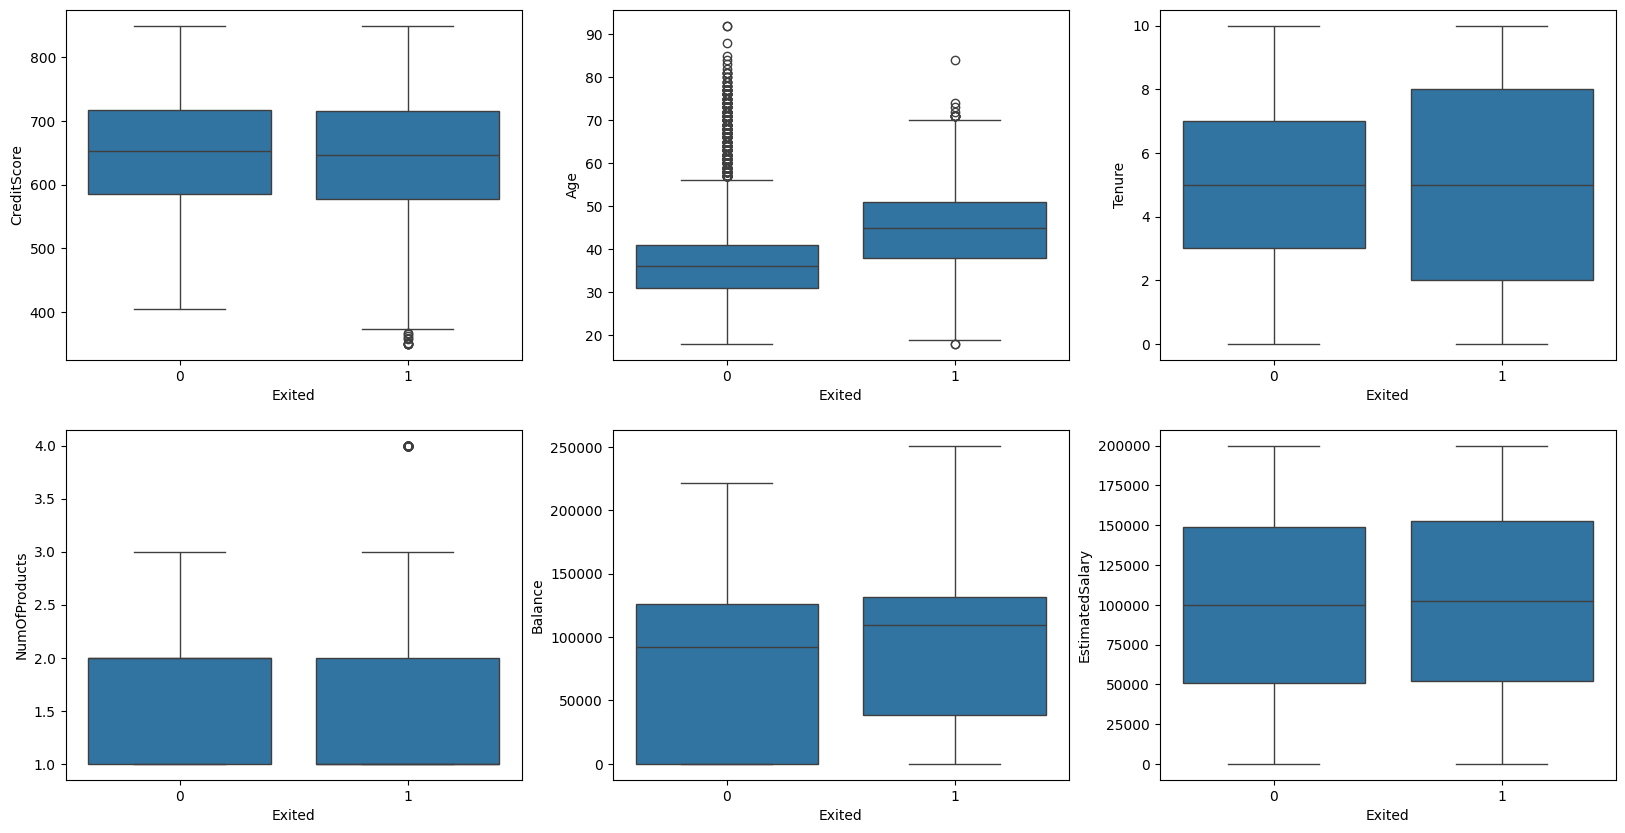

In [ ]:
_,axss = plt.subplots(2, 3, figsize=[20, 10])
sns.boxplot(x='Exited', y = 'CreditScore', data = churn_data, ax = axss[0][0])
sns.boxplot(x='Exited', y = 'Age', data = churn_data, ax = axss[0][1])
sns.boxplot(x='Exited', y = 'Tenure', data = churn_data, ax = axss[0][2])
sns.boxplot(x='Exited', y = 'NumOfProducts', data = churn_data, ax = axss[1][0])
sns.boxplot(x='Exited', y = 'Balance', data = churn_data, ax = axss[1][1])
sns.boxplot(x='Exited', y = 'EstimatedSalary', data = churn_data, ax = axss[1][2])

#Part 3: Feature Preprocessing


<Axes: xlabel='Exited', ylabel='count'>

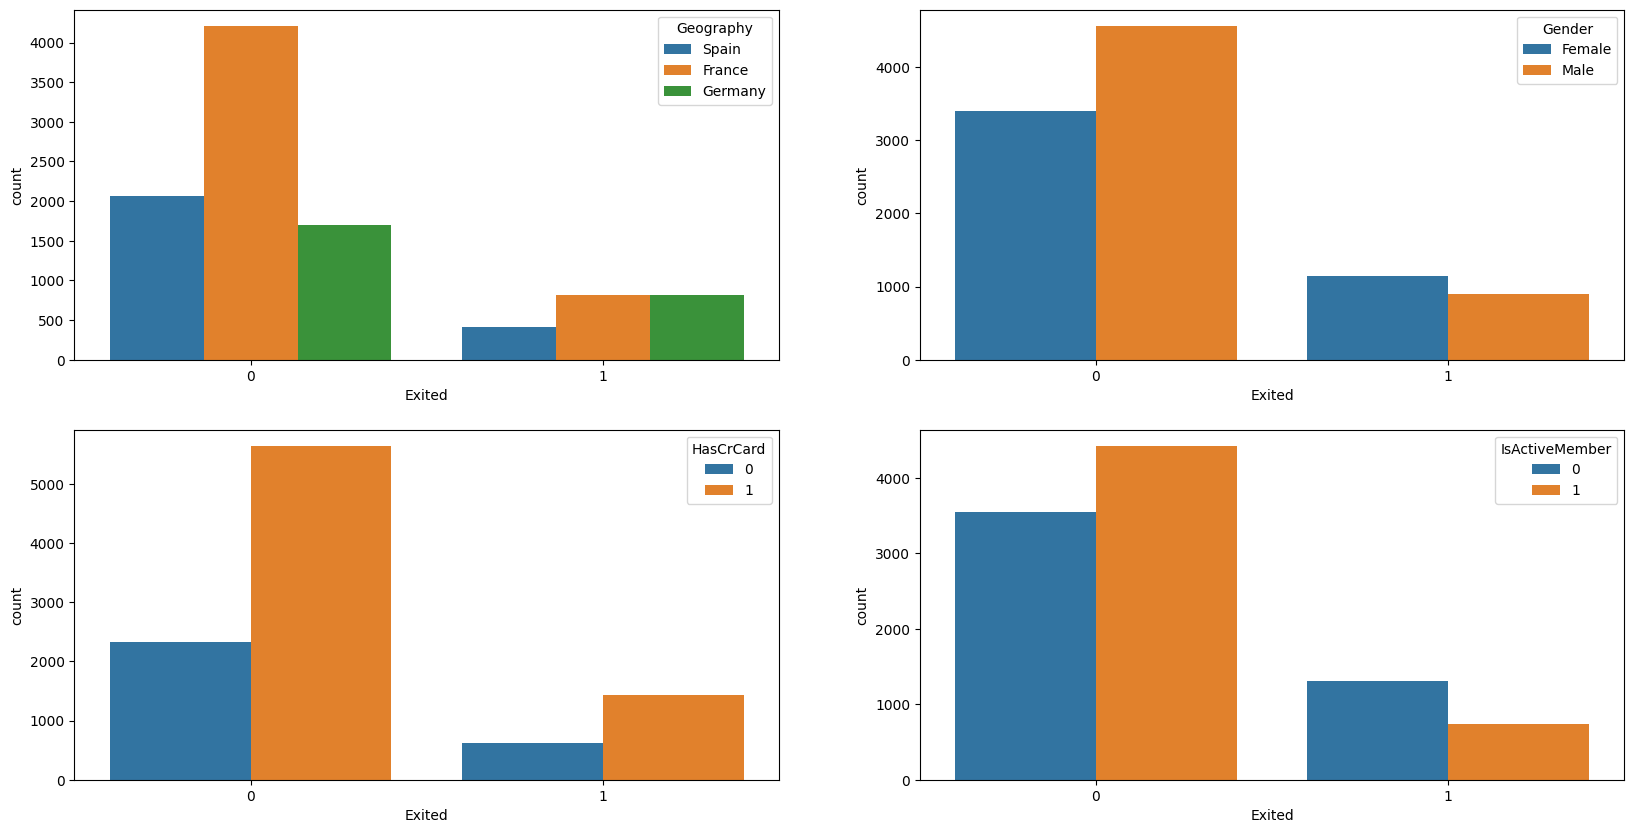

In [ ]:
# understand categorical feature
_, axss = plt.subplots(2, 2, figsize=[20, 10])
sns.countplot(x = 'Exited', hue = 'Geography', data = churn_data, ax = axss[0][0])
sns.countplot(x = 'Exited', hue = 'Gender', data = churn_data, ax = axss[0][1])
sns.countplot(x = 'Exited', hue = 'HasCrCard', data = churn_data, ax = axss[1][0])
sns.countplot(x = 'Exited', hue = 'IsActiveMember', data = churn_data, ax = axss[1][1])

In [ ]:
# Dropping the useless features
to_drop = ['RowNumber', 'CustomerId', 'Surname', 'Exited']
data_dropped = churn_data.drop(to_drop, axis=1)

In [63]:
data_dropped.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
data_dropped.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [67]:
cat_cols = data_dropped.columns[data_dropped.dtypes == 'Object']
num_cols = data_dropped.columns[(data_dropped.dtypes == 'float 64') | (data_dropped.dtypes == 'int64')]

In [66]:
cat_cols

Index([], dtype='object')

In [65]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember'],
      dtype='object')

In [68]:
# split dataset into training data and test data
# stratified sampling

from sklearn import model_selection

A_train, A_test, B_train, B_test = model_selection.train_test_split(data_dropped, Exited, test_size=0.25, stratify = Exited, random_state=1) #stratified sampling

print('training data has ' + str(A_train.shape[0]) + ' observation with ' + str(A_train.shape[1]) + ' features')
print('test data has ' + str(A_test.shape[0]) + ' observation with ' + str(A_test.shape[1]) + ' features')

training data has 7500 observation with 10 features
test data has 2500 observation with 10 features


In [69]:
A_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7971,633,Spain,Male,42,10,0.00,1,0,1,79408.17
9152,708,Germany,Female,23,4,71433.08,1,1,0,103697.57
6732,548,France,Female,37,9,0.00,2,0,0,98029.58
902,645,France,Female,48,7,90612.34,1,1,1,149139.13
2996,729,Spain,Female,45,7,91091.06,2,1,0,71133.12


In [70]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns = enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(A_train[categories])

A_train = OneHotEncoding(A_train, enc_ohe, categories)
A_test = OneHotEncoding(A_test, enc_ohe, categories)


In [71]:
A_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,Male,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,Female,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,Female,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,Female,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,Female,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [72]:
# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(A_train[categories])

A_train[categories] = enc_oe.transform(A_train[categories])
A_test[categories] = enc_oe.transform(A_test[categories])

In [73]:
A_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,1.0,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,0.0,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,0.0,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,0.0,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,0.0,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [74]:
# Standardlize Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(A_train[num_cols])

A_train[num_cols] = scaler.transform(A_train[num_cols])
A_test[num_cols] = scaler.transform(A_test[num_cols])

In [75]:
A_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.172985,1.0,0.289202,1.731199,0.00,-0.912769,-1.542199,0.968496,79408.17,0.0,0.0,1.0
1,0.602407,0.0,-1.509319,-0.341156,71433.08,-0.912769,0.648425,-1.032529,103697.57,0.0,1.0,0.0
2,-1.051762,0.0,-0.184093,1.385806,0.00,0.796109,-1.542199,-1.032529,98029.58,1.0,0.0,0.0
3,-0.048922,0.0,0.857156,0.695022,90612.34,-0.912769,0.648425,0.968496,149139.13,1.0,0.0,0.0
4,0.819517,0.0,0.573179,0.695022,91091.06,0.796109,0.648425,-1.032529,71133.12,0.0,0.0,1.0


# Part 4: Model Training and Result Evaluation



In [80]:
# build models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
classfier_logistic = LogisticRegression()

# K Nearest Neighbors
classfier_KNN = KNeighborsClassifier()

# Random Forest
classfier_RF = RandomForestClassifier()

In [77]:
classfier_logistic.fit(A_train, B_train)

LogisticRegression()

In [78]:
classfier_logistic.predict(A_test)

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
classfier_logistic.score(A_test, B_test)

0.7964

In [85]:
# Find Optimal Hyperparameters - LogisticRegression
from sklearn.model_selection import GridSearchCV

def print_grid_search_result(gs):
  print("Best score: " + str(gs.best_score_))
  print("Best Parameters set:")
  best_parameters = gs.best_params_
  for param_name in sorted(best_parameters.keys()):
    print(param_name + ":" + str(best_parameters[param_name]))

In [101]:
parameters = {
    'penalty':('l2', 'l1'),
    'C': (0.01, 0.05, 0.1, 0.2, 1)
}

grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv=5)
grid_LR.fit(A_train, B_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l2', 'l1')})

In [97]:
print_grid_search_result(grid_LR)

Best score: 0.8129333333333333
Best Parameters set:
C:0.2
penalty:l1


In [98]:
best_LR_model = grid_LR.best_estimator_

In [99]:
best_LR_model.predict(A_test)

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
best_LR_model.score(A_test, B_test)

0.8096

<ipython-input-92-5a44d2438de9>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score'))


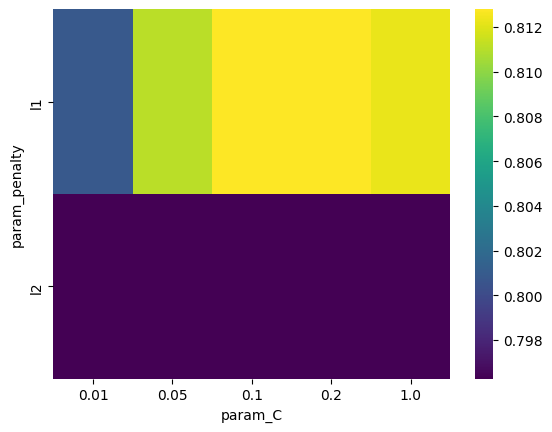

In [92]:
LR_models = pd.DataFrame(grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score'))
_ = sns.heatmap(res, cmap='viridis')

In [103]:
# Find Optimal Hyperparameters: KNN
parameters = {
    'n_neighbors':[1, 3, 5, 7, 9]
}
grid_KNN = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
grid_KNN.fit(A_train, B_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [104]:
print_grid_search_result(grid_KNN)

Best score: 0.7854666666666666
Best Parameters set:
n_neighbors:9


In [105]:
best_KNN_model = grid_KNN.best_estimator_

In [106]:
best_KNN_model.predict(A_test)

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
best_KNN_model.score(A_test, B_test)

0.7756

In [108]:
# Find Optimal Hyperparameters for Random Forest
parameters = {
    'n_estimators': [60, 80, 100],
    'max_depth': [1, 5, 10]
}
grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
grid_RF.fit(A_train, B_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [109]:
print_grid_search_result(grid_RF)

Best score: 0.866
Best Parameters set:
max_depth:10
n_estimators:60


In [110]:
best_RF_model = grid_RF.best_estimator_

In [114]:
best_RF_model.predict(A_test)

array([0, 0, 0, ..., 0, 0, 0])

In [115]:
best_RF_model.score(A_test, B_test)

0.8612

In [116]:
# Model Evaluation - Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classfier, cm):
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  accuracy = (tp + tn) / (tp + fp + fn + tn + 0.0)
  precision = tp / (tp + fp + 0.0)
  recall = tp / (tp + fn + 0.0)
  print(classfier)
  print("Accuracy is: " + str(accuracy))
  print("Precision is: " + str(precision))
  print("recall is: " + str(recall))
  print ()

def draw_confusion_matrices(confusion_matrix):
  class_names = ['Not', 'Churn']
  for cm in confusion_matrices:
    classfier, cm = cm[0], cm[1]
    cal_evaluation(classfier, cm)

In [117]:
confusion_matrices = [
    ("Random Forest", confusion_matrix(B_test, best_RF_model.predict(A_test))),
    ("Logistic Regression", confusion_matrix(B_test, best_LR_model.predict(A_test))),
    ("K nearest neighbor", confusion_matrix(B_test, best_KNN_model.predict(A_test)))
]
draw_confusion_matrices(confusion_matrix)

Random Forest
Accuracy is: 0.8612
Precision is: 0.8188976377952756
recall is: 0.4086444007858546

Logistic Regression
Accuracy is: 0.8096
Precision is: 0.6012269938650306
recall is: 0.1925343811394892

K nearest neighbor
Accuracy is: 0.7756
Precision is: 0.19767441860465115
recall is: 0.03339882121807466



In [118]:
# Model Evaluation - ROC & AUC
from sklearn.metrics import roc_curve
from sklearn import metrics

B_pred_rf = best_RF_model.predict_proba(A_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(B_test, B_pred_rf)

In [119]:
best_RF_model.predict_proba(A_test)

array([[0.74500352, 0.25499648],
       [0.95346091, 0.04653909],
       [0.75369508, 0.24630492],
       ...,
       [0.86922589, 0.13077411],
       [0.93896059, 0.06103941],
       [0.92015066, 0.07984934]])

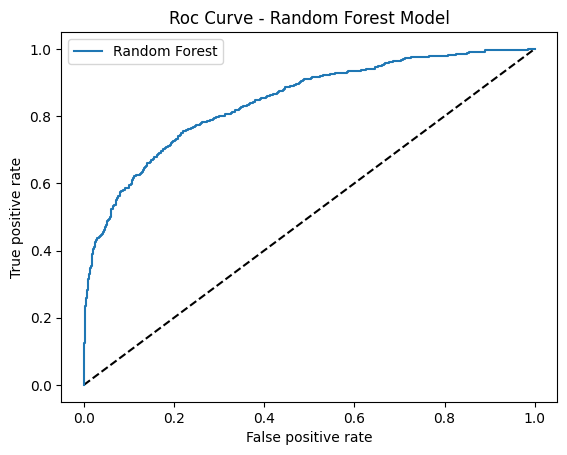

In [120]:
# Roc curve of Random Forest result
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Roc Curve - Random Forest Model')
plt.legend(loc='best')
plt.show()

In [121]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf, tpr_rf)

0.8438730673097701

In [126]:
# ROC of LR Model
B_pred_lf = best_LR_model.predict_proba(A_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(B_test, B_pred_rf)

In [123]:
best_LR_model.predict_proba(A_test)

array([[0.82328383, 0.17671617],
       [0.92905408, 0.07094592],
       [0.8544419 , 0.1455581 ],
       ...,
       [0.71642925, 0.28357075],
       [0.8908088 , 0.1091912 ],
       [0.85553702, 0.14446298]])

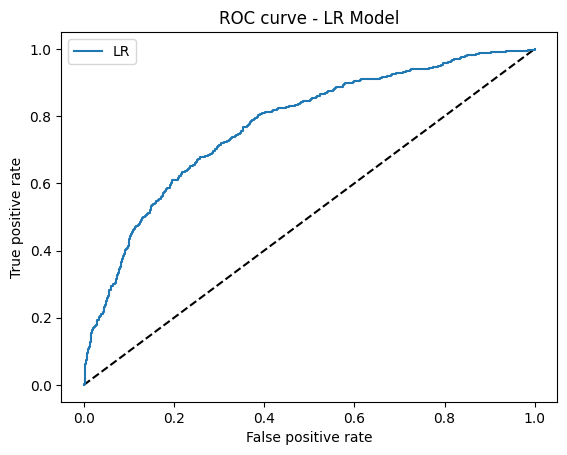

In [131]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [132]:
metrics.auc(fpr_lr, tpr_lr)

0.7719965779208796

# Part 5: Model Extra Functionality


In [135]:
A_with_corr = data_dropped.copy()

A_with_corr = OneHotEncoding(A_with_corr, enc_ohe, ['Geography'])
A_with_corr['Gender'] = enc_oe.transform(A_with_corr[['Gender']])
A_with_corr['SalaryInRMB'] = A_with_corr['EstimatedSalary'] * 7.1
A_with_corr.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,SalaryInRMB
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,719577.048
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,799052.318
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,808914.147
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,666169.073
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,561497.110


In [140]:
# add L1 regularizatio to logistic regression
# check the Coefficients for feature selection
scaler = StandardScaler()
A_l1 = scaler.fit_transform(A_with_corr)
LRmodel_l1 = LogisticRegression(penalty='l1', C=0.04, solver='liblinear')
LRmodel_l1.fit(A_l1, Exited)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print('Logistic Regression (L1) Coefficients')
for ind in range(A_with_corr.shape[1]):
  print("{0} : {1}".format(A_with_corr.columns[indices[ind]], round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.7307
IsActiveMember : -0.5046
Geography_Germany : 0.312
Gender : -0.2409
Balance : 0.1509
CreditScore : -0.0457
NumOfProducts : -0.0439
Tenure : -0.0271
EstimatedSalary : 0.0091
Geography_France : -0.0043
HasCrCard : -0.0022
SalaryInRMB : 0.0001
Geography_Spain : 0.0


In [144]:
# add L2 regularizatio to logistic regression
# check the Coefficients for feature selection
np.random.seed()
scaler = StandardScaler()
A_l2 = scaler.fit_transform(A_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(A_l2, Exited)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print('Logistic Regression (L2) Coefficients')
for ind in range(A_with_corr.shape[1]):
  print("{0} : {1}".format(A_with_corr.columns[indices[ind]], round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
Age : 0.751
IsActiveMember : -0.5272
Gender : -0.2591
Geography_Germany : 0.2279
Balance : 0.162
Geography_France : -0.1207
Geography_Spain : -0.089
CreditScore : -0.0637
NumOfProducts : -0.0586
Tenure : -0.0452
HasCrCard : -0.0199
SalaryInRMB : 0.0137
EstimatedSalary : 0.0137


In [145]:
# Random Forest Model - Feature Importance
A_RF = data_dropped.copy()

A_RF = OneHotEncoding(A_RF, enc_ohe, ['Geography'])
A_RF['Gender'] = enc_oe.transform(A_RF[['Gender']])
A_RF.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [146]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(A_RF, Exited)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature importance ranking by Random Forest Model:")
for ind in range(data_dropped.shape[1]):
  print("{0} : {1}".format(A_RF.columns[indices[ind]], round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2407
CreditScore : 0.1449
EstimatedSalary : 0.1448
Balance : 0.1415
NumOfProducts : 0.1283
Tenure : 0.0828
IsActiveMember : 0.0403
Geography_Germany : 0.0213
Gender : 0.019
HasCrCard : 0.0183
